In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the given CSV file, and view some sample records
advertising = pd.read_csv( "winequality-red.csv" )
advertising.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


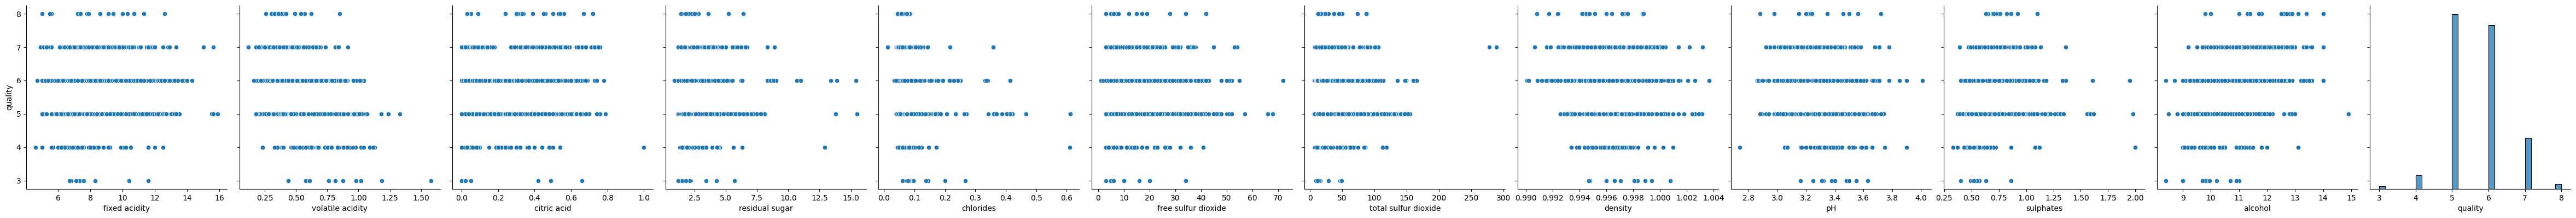

In [ ]:
#to plot all the scatterplots in a single plot

sns.pairplot(advertising, x_vars=['fixed acidity',	'volatile acidity',	'citric acid','residual sugar','chlorides','free sulfur dioxide'	,'total sulfur dioxide'	,'density',	'pH',	'sulphates'	,'alcohol'	,'quality'], y_vars='quality', height=4, kind='scatter')
plt.show()


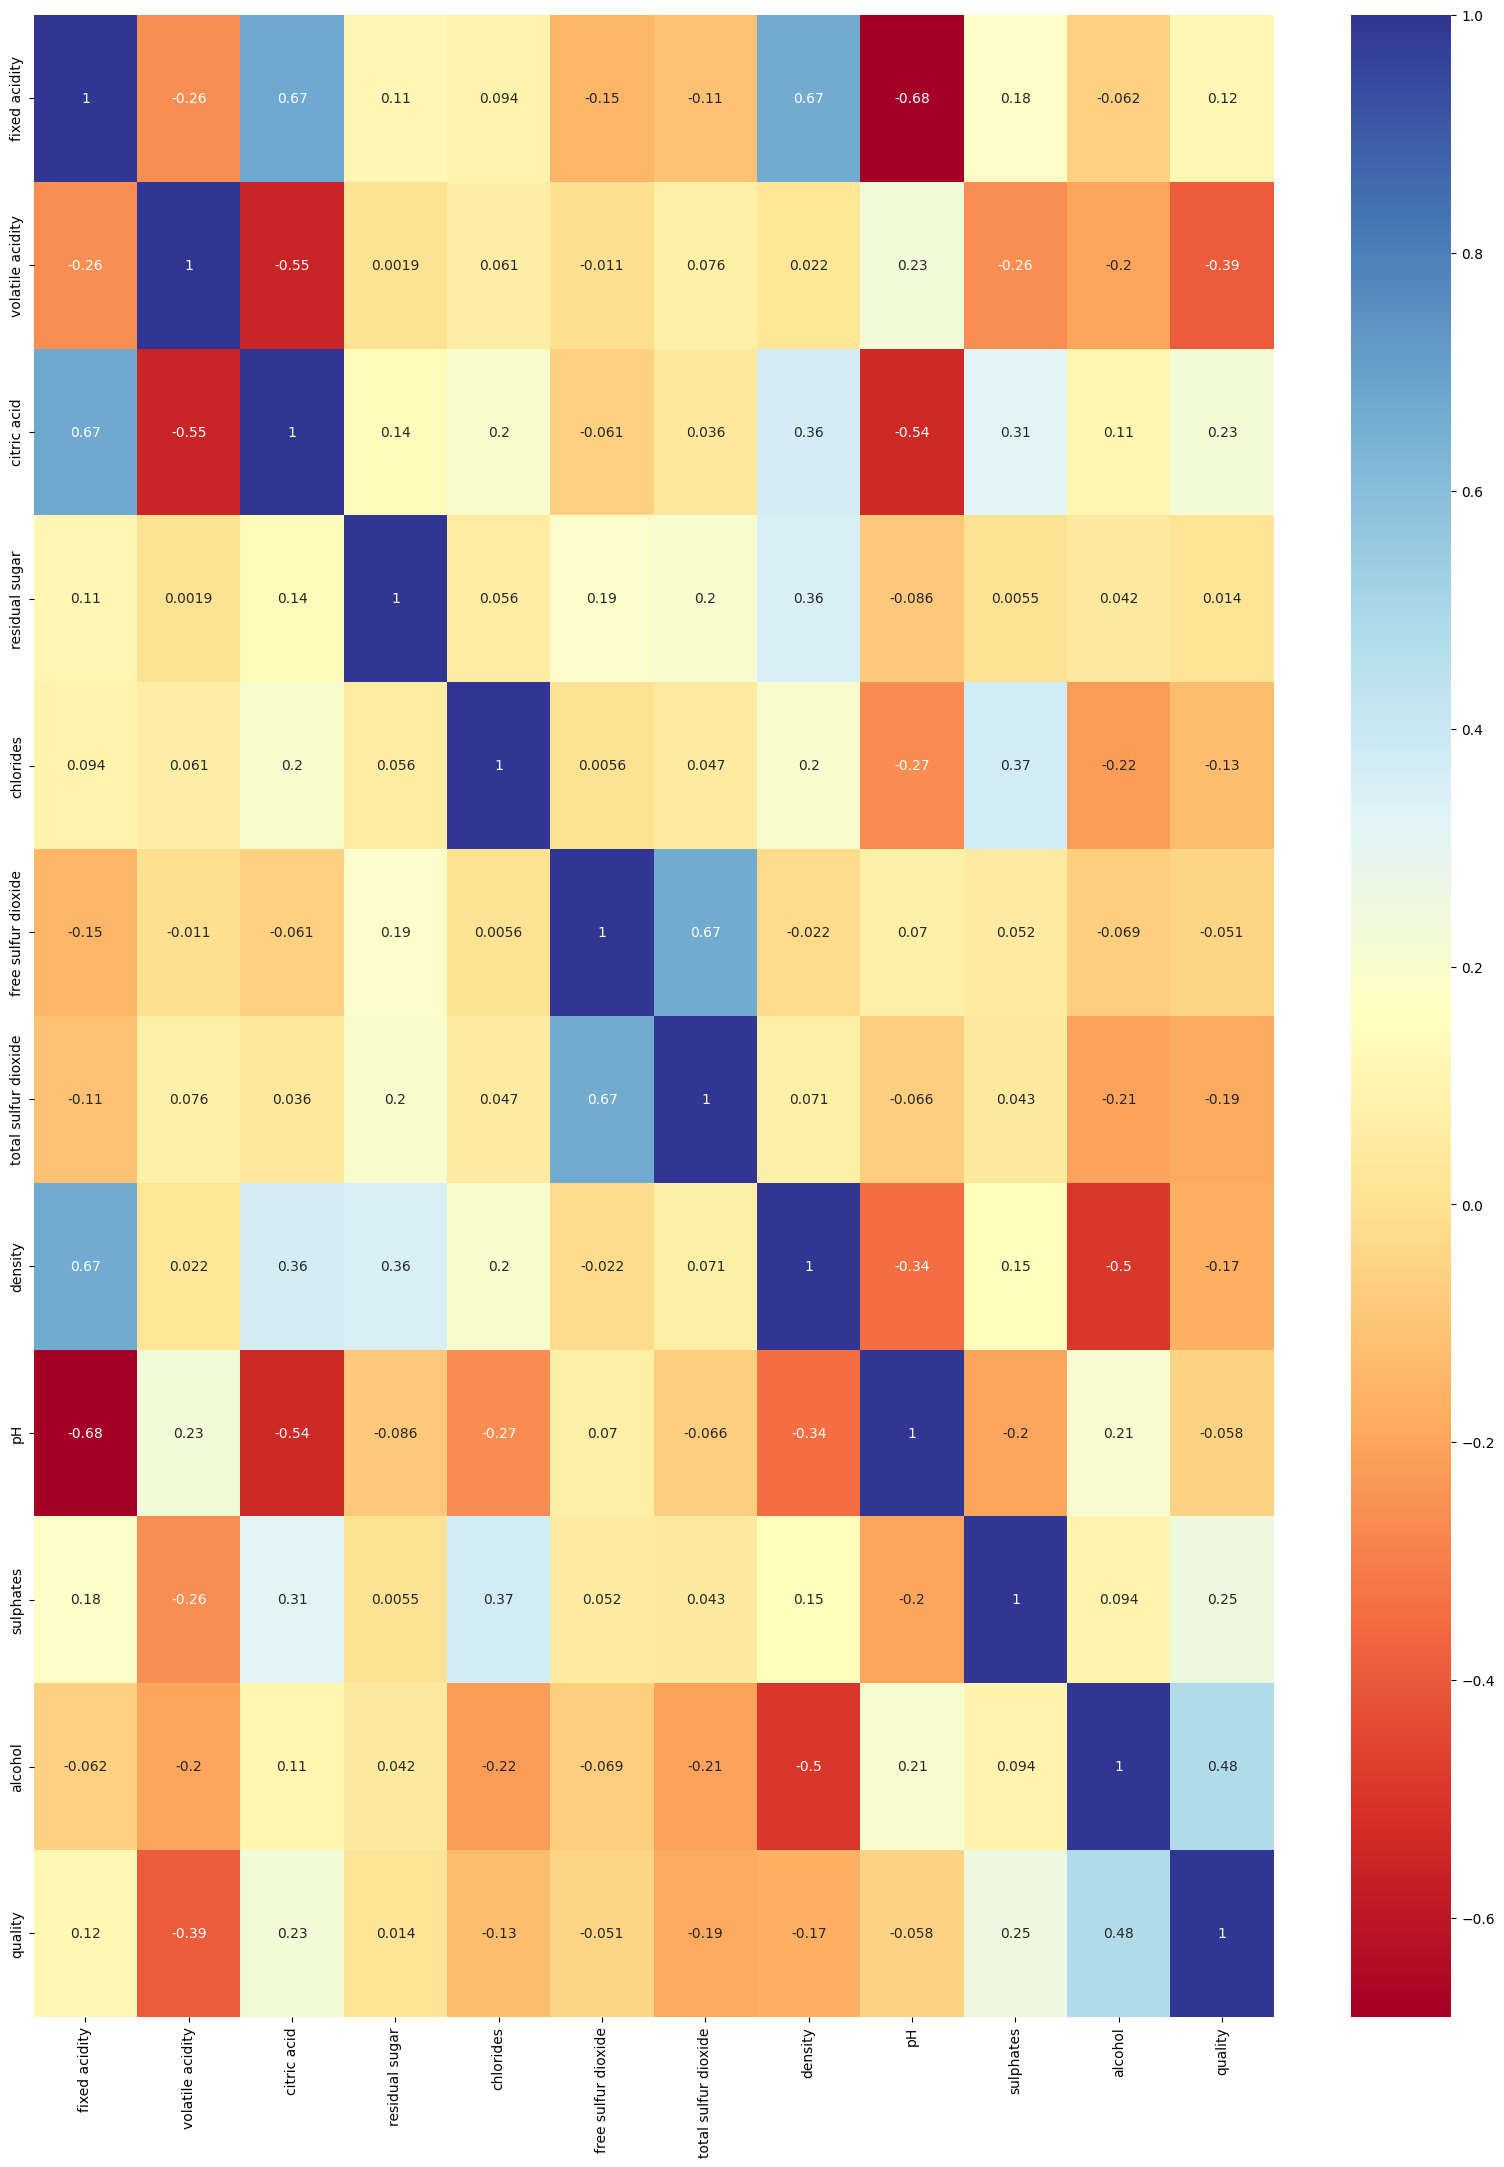

In [ ]:
#To plot heatmap to find out correlations
plt.figure(figsize=(20,26))
sns.heatmap(advertising.corr(), cmap='RdYlBu', annot=True)
plt.show()


In [ ]:
#AS TV is impacting the sales heavily so for analysisng TV
X = advertising.drop('quality', axis=1)
y = advertising['quality']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
#To check how data is assigned
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [ ]:
# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#for linearreggession add extra column
# Initiate the model and fit into the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))
y_pred = LR.predict(X_train)

print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred_test = LR.predict(X_test)


Coefficient of determination:  0.34799261935340087
R^2:  0.34799261935340087
MAE:  0.49961964114872637
MSE:  0.4241911573137203
RMSE:  0.6512995910590765


In [ ]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()


,actual,predicted,residual
803,6,5.346664,0.653336
124,5,5.056313,-0.056313
350,6,5.664470,0.335530
682,5,5.464515,-0.464515
1326,6,5.725185,0.274815


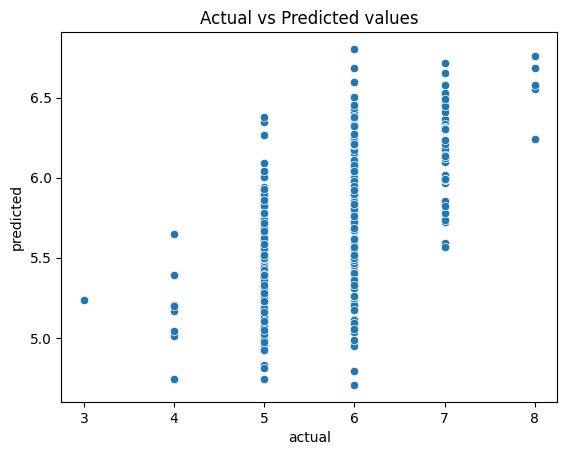

In [ ]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

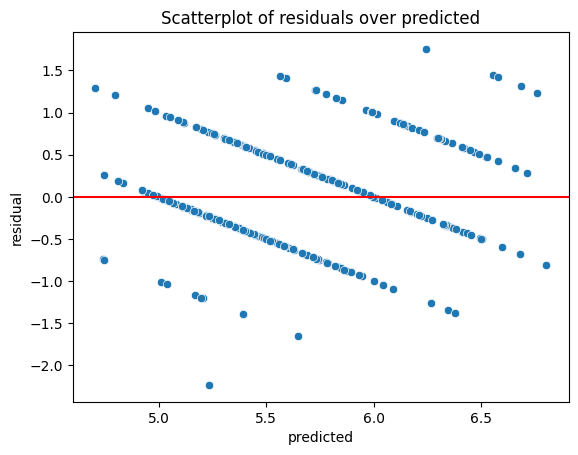

In [ ]:
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

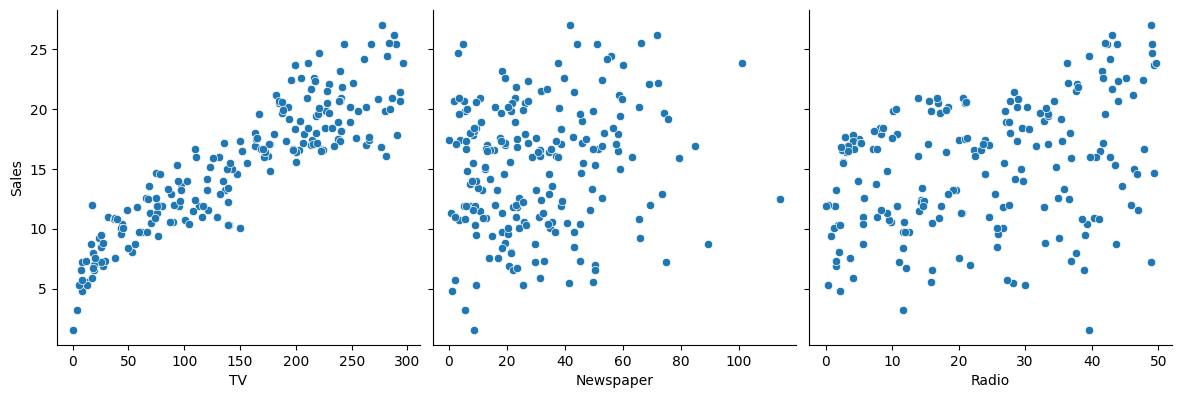

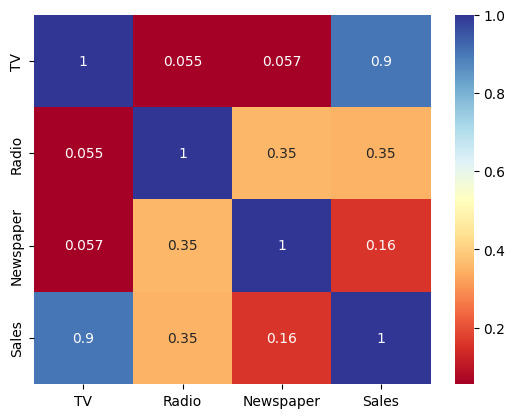

(160, 3)
(40, 3)
(160,)
(40,)
[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 

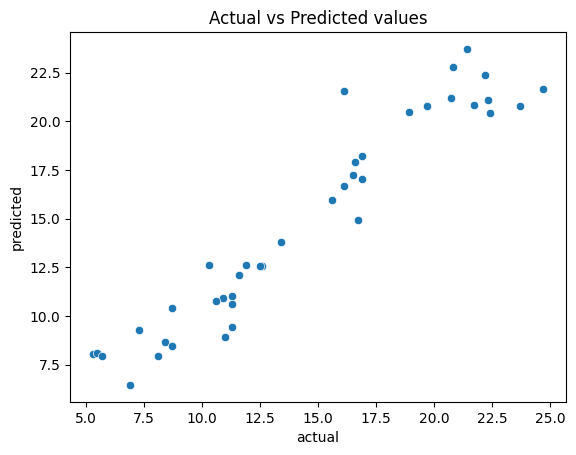

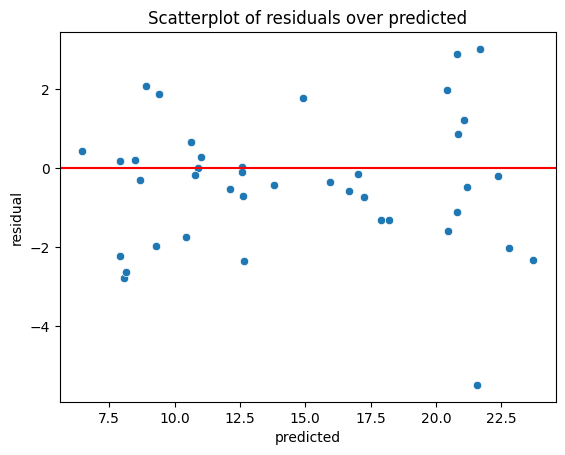

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Read the given CSV file, and view some sample records
advertising = pd.read_csv( "advertising.csv" )
advertising.head()

#to plot all the scatterplots in a single plot

sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, kind='scatter')
plt.show()

#To plot heatmap to find out correlations
sns.heatmap(advertising.corr(), cmap='RdYlBu', annot=True)
plt.show()

#AS TV is impacting the sales heavily so for analysisng TV
X = advertising.drop('Sales', axis=1)
y = advertising['Sales']
X.head()

#For traing and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 100 )

#To check how data is assigned
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#for linearreggession add extra column
# Initiate the model and fit into the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

y_pred = LR.predict(X_train)

print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred_test = LR.predict(X_test)

# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()

# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()